In [1]:
from Bio import SeqIO

In [2]:
from Bio.Data import CodonTable

In [3]:
import pandas as pd

## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook

Dr. X's function is to extract sequences from files, it takes a file and returns sequences that paired with species names in a dictionary

In [4]:
def get_sequences_from_file(fasta_fn): # define a function to get sequences from files
    sequence_data_dict = {} # create an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # takes a filename and format name, and returns a SeqRecord iterator
        description = record.description.split() # split the description in the SeqRecord object, save to a new variable description
        species_name = description[1] + " " + description[2] # extract the second and third element from the description, save to a new variable species_name 
        sequence_data_dict[species_name] = record.seq # assign the sequence in the SeqRecord object in the dictionary using species_name as the key
    return(sequence_data_dict) # return the dictionary with species name and sequences

## 2. Write a function that translates a string of nucleotides to amino acids 

* pseudo-code and suggestions
def translate_function(string_nucleotides): 
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
this is how you can retrieve the amino acid: mito_table.forward_table[codon]
add the aa to aa_seq_string
return(aa_seq_string)

In [5]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ''
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon not in mito_table.stop_codons:
            aa_seq_string += mito_table.forward_table[codon]
    return(aa_seq_string)
translate_function("ATGTTGACGTGATAA") # test the function

'MLTW'

## 3. Write an alternative translation function

In [6]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
def easy_translate_function(string_nucleotides):
    coding_dna = Seq(string_nucleotides, generic_dna)
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial")
    return(aa_seq_string)
easy_translate_function("ATGTTGACGTGATAA") # test the function

Seq('MLTW*', HasStopCodon(ExtendedIUPACProtein(), '*'))

## 4. Write a function (or 3 functions) that calculates the proportion of each of 3 amino acid categories in a sequence

In [7]:
# calculates the proportion of charged amino acids
def get_proportion_charged_function(aa_seq):
    charged = ['R','K','D','E']
    count_charged = 0
    for i in aa_seq:
        if i in charged:
            count_charged += 1
    proportion_charged = count_charged/len(aa_seq)
    return proportion_charged

get_proportion_charged_function('RKEAAA') # test the function

0.5

In [8]:
# calculates the proportion of polar amino acids
def get_proportion_polar_function(aa_seq):
    polar = ['Q','N','H','S','T','Y','C','M','W']
    count_polar = 0
    for i in aa_seq:
        if i in polar:
            count_polar += 1
    proportion_polar = count_polar/len(aa_seq)
    return proportion_polar

get_proportion_polar_function('RKEAAA') # test the function

0.0

In [9]:
# calculates the proportion of hydrophobic amino acids
def get_proportion_hydrophobic_function(aa_seq):
    hydrophobic = ['A','I','L','F','V','P','G']
    count_hydrophobic = 0
    for i in aa_seq:
        if i in hydrophobic:
            count_hydrophobic += 1
    proportion_hydrophobic = count_hydrophobic/len(aa_seq)
    return proportion_hydrophobic

get_proportion_hydrophobic_function('RKEAAA') # test the function

0.5

## 5. Call your functions from 3 (or 2) and 4 and complete the empty columns in the dataframe

In [10]:
# read in the dataframe with the species and mass
bear_df = pd.read_csv("bears_data.csv")
# get sequences with the species 
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")
# generate empty list to store calculated amino acids
charged_list = []
polar_list = []
hydrophobic_list = []
# loop through the sequences, translate and calculate the amino acid composition
for k, v in cytb_seqs.items():
    aa_seq = translate_function(v)
    charged_list.append(get_proportion_charged_function(aa_seq))
    polar_list.append(get_proportion_polar_function(aa_seq))
    hydrophobic_list.append(get_proportion_hydrophobic_function(aa_seq))

/Users/xinyufu/anaconda/lib/python3.5/site-packages/Bio/Seq.py:150: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


In [11]:
list(cytb_seqs.keys())

['Ursus maritimus',
 'Ursus americanus',
 'Melursus ursinus',
 'Ursus spelaeus',
 'Ailuropoda melanoleuca',
 'Helarctos malayanus',
 'Ursus thibetanus',
 'Ursus arctos',
 'Tremarctos ornatus']

In [12]:
list(bear_df.species)


['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

In [13]:
# Noted that the species list in the bear_df is not in the same order as the species in the 
# keys of the cytb_seqs object, so I change the species column in the bear_df
bear_df['species']=list(cytb_seqs.keys())
# Fill in the empty cells with calculated amino acid composition
bear_df['charged'] = charged_list
bear_df['polar'] = polar_list
bear_df['hydrophobic'] = hydrophobic_list
bear_df

,species,mass,charged,polar,hydrophobic
0,Ursus maritimus,550.800,0.092348,0.327177,0.580475
1,Ursus americanus,203.500,0.089710,0.337731,0.572559
2,Melursus ursinus,99.714,0.089710,0.340369,0.569921
3,Ursus spelaeus,100.030,0.092348,0.329815,0.577836
4,Ailuropoda melanoleuca,110.560,0.089710,0.343008,0.567282
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282
6,Ursus thibetanus,118.200,0.092348,0.327177,0.580475
7,Ursus arctos,140.700,0.092348,0.324538,0.583113
8,Tremarctos ornatus,425.100,0.089710,0.335092,0.575198


## 6. Plot a bar-chart of adult mass per species

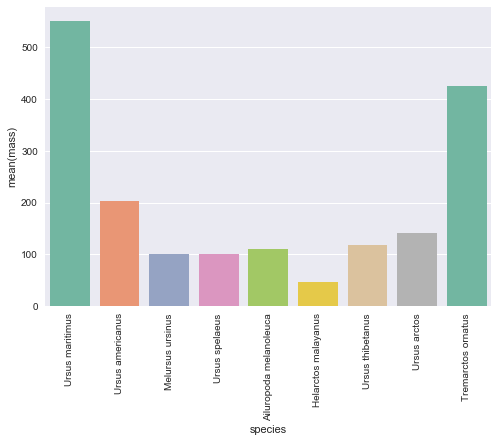

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
mass = sns.barplot(x = 'species', y = 'mass', data=bear_df, palette="Set2")
for item in mass.get_xticklabels():
    item.set_rotation(90)

Ursus spelaeus is the largest bear species. It is almost 10 times larger than Tremarctos ornatus.

## 7. Plot a graph that shows the amino-acid type proportions

In [15]:
bear_df_melt = pd.melt(bear_df, id_vars=['species', 'mass'], value_vars=['charged','polar','hydrophobic'])

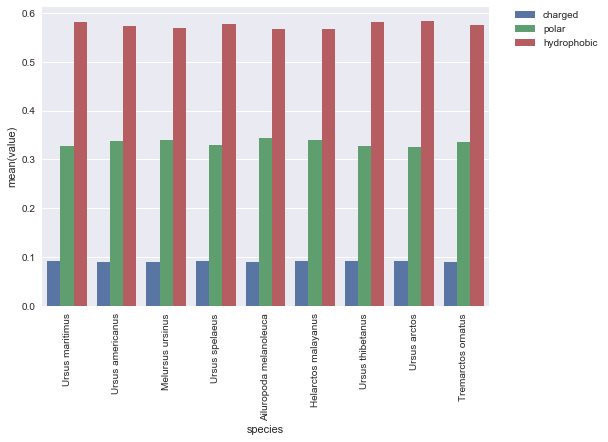

In [16]:
aaplot = sns.barplot(x = 'species', y = 'value', hue='variable', data=bear_df_melt)
for item in aaplot.get_xticklabels():
    item.set_rotation(90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The proportions for amino-acid type for the bear species look similar.


## 8. Write the entire dataframe to a new CSV file

In [17]:
bear_df.to_csv('new_bear_df', header=True)

## 9. Multiple linear regression

In [20]:
import statsmodels.formula.api as smf
# create a fitted model with all three types of amino acid proprotions to predict mass
lm = smf.ols(formula='mass ~ charged + polar + hydrophobic', data=bear_df).fit()
lm.summary()


/Users/xinyufu/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mass   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.073
Date:                Fri, 31 Mar 2017   Prob (F-statistic):              0.400
Time:                        17:40:39   Log-Likelihood:                -57.168
No. Observations:                   9   AIC:                             120.3
Df Residuals:                       6   BIC:                             120.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1.258e+04   1.11e+04     -1.131      0.301     -3.98e+04  1.46e+04
charged     -4.494e+04   4.17e+04     -1.077      0.323     -1.47e+05  5.71e+04
polar        7152.6074   1.23e+04      0.581      0.583      -2.3e+04  3.73e+04
hydrophobic   2.52e+04   1.99e+04      1.270      0.251     -2.34e+04  7.38e+04
==============================================================================
Omnibus:                        4.876   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                1.913
Skew:                           1.125   Prob(JB):                        0.384
Kurtosis:                       3.197   Cond. No.                     2.74e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Unfortunately, all three predictors have insignificant p-values. This is not a good model.